In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import jax.random as jr
from jax.tree_util import Partial

import graphgp as gp

import matplotlib.pyplot as plt

rng = jr.key(137)

In [7]:
n_points = 100_000
rng, k1 = jr.split(rng, 2)
points = jr.normal(k1, (n_points, 2))

graph = gp.build_graph(points, n0=1000, k=10)
covariance = gp.MaternCovariance(p=0)

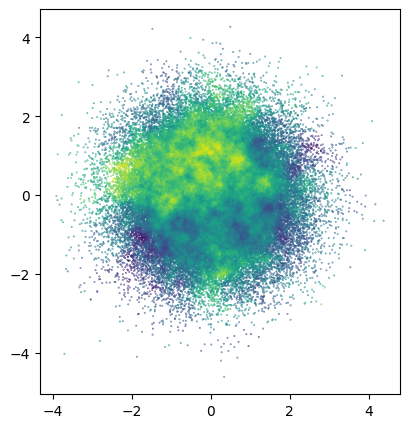

In [14]:
rng, k1 = jr.split(rng)
xi = jr.normal(k1, (n_points,))
values = jax.jit(gp.generate)(graph, covariance, xi)

plt.figure(figsize=(5, 5))
plt.scatter(*points.T, c=values, s=.1)
plt.gca().set(aspect='equal')
plt.show()